**2 часть**

Задание 1

In [ ]:
def mean(data):
    """Среднее арифметическое"""
    return sum(data) / len(data) if data else None

def median(data):
    """Медиана"""
    sorted_data = sorted(data)
    n = len(sorted_data)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return sorted_data[mid]

def mode(data):
    """Мода"""
    if not data:
        return None
    freq = {}
    for x in data:
        freq[x] = freq.get(x, 0) + 1
    max_freq = max(freq.values())
    modes = [k for k, v in freq.items() if v == max_freq]
    return modes[0] if len(modes) == 1 else modes

def data_range(data):
    """Размах"""
    return max(data) - min(data) if data else None

def variance(data, sample=False):
    """Дисперсия"""
    if not data:
        return None
    m = mean(data)
    n = len(data) - 1 if sample else len(data)
    return sum((x - m) ** 2 for x in data) / n

def std_dev(data, sample=False):
    """Стандартное отклонение"""
    import math
    var = variance(data, sample)
    return math.sqrt(var) if var is not None else None

# Тестирование на примере из задания
data = [1, 5, 2, 7, 1, 6, 3, 8, 5, 8, 1, 2]

print("Реализация с нуля:")
print(f"Среднее: {mean(data):.4f}")
print(f"Медиана: {median(data)}")
print(f"Мода: {mode(data)}")
print(f"Размах: {data_range(data)}")
print(f"Дисперсия (генеральная): {variance(data):.4f}")
print(f"Стандартное отклонение: {std_dev(data):.4f}")

Реализация с нуля:
Среднее: 4.0833
Медиана: 4.0
Мода: 1
Размах: 7
Дисперсия (генеральная): 6.9097
Стандартное отклонение: 2.6286


Задание 2


In [ ]:
import statistics
import numpy as np
import pandas as pd
from scipy import stats

data = [1, 5, 2, 7, 1, 6, 3, 8, 5, 8, 1, 2]
arr = np.array(data)
series = pd.Series(data)

print("Сравнение результатов\n")

# Среднее
print(f"statistics.mean:      {statistics.mean(data):.4f}")
print(f"numpy.mean:           {np.mean(arr):.4f}")
print(f"pandas.mean:          {series.mean():.4f}")

# Медиана
print(f"\nstatistics.median:    {statistics.median(data):.4f}")
print(f"numpy.median:         {np.median(arr):.4f}")
print(f"pandas.median:        {series.median():.4f}")

# Мода
print(f"\nstatistics.mode:      {statistics.mode(data)}")  # возвращает один режим
print(f"scipy.stats.mode:     {stats.mode(arr, keepdims=True).mode[0]}")
print(f"pandas.mode:          {series.mode().tolist()}")  # все моды

# Размах
print(f"\nnumpy.ptp (размах):   {np.ptp(arr)}")
print(f"max-min:              {arr.max() - arr.min()}")

# Дисперсия
print(f"\nstatistics.pvariance: {statistics.pvariance(data):.4f} (генеральная)")
print(f"statistics.variance:  {statistics.variance(data):.4f} (выборочная)")
print(f"numpy.var (ddof=0):   {np.var(arr, ddof=0):.4f} (генеральная)")
print(f"numpy.var (ddof=1):   {np.var(arr, ddof=1):.4f} (выборочная)")
print(f"pandas.var (ddof=1):  {series.var():.4f} (выборочная)")

# Стандартное отклонение
print(f"\nstatistics.pstdev:    {statistics.pstdev(data):.4f} (генеральное)")
print(f"statistics.stdev:     {statistics.stdev(data):.4f} (выборочное)")
print(f"numpy.std (ddof=0):   {np.std(arr, ddof=0):.4f}")
print(f"numpy.std (ddof=1):   {np.std(arr, ddof=1):.4f}")
print(f"pandas.std (ddof=1):  {series.std():.4f}")

Сравнение результатов

statistics.mean:      4.0833
numpy.mean:           4.0833
pandas.mean:          4.0833

statistics.median:    4.0000
numpy.median:         4.0000
pandas.median:        4.0000

statistics.mode:      1
scipy.stats.mode:     1
pandas.mode:          [1]

numpy.ptp (размах):   7
max-min:              7

statistics.pvariance: 6.9097 (генеральная)
statistics.variance:  7.5379 (выборочная)
numpy.var (ddof=0):   6.9097 (генеральная)
numpy.var (ddof=1):   7.5379 (выборочная)
pandas.var (ddof=1):  7.5379 (выборочная)

statistics.pstdev:    2.6286 (генеральное)
statistics.stdev:     2.7455 (выборочное)
numpy.std (ddof=0):   2.6286
numpy.std (ddof=1):   2.7455
pandas.std (ddof=1):  2.7455


Задание 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_Y3wMUE5_7gLdaTN.csv')

# Выбор количественных признаков
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Очистка от пропусков для анализа
df_clean = df[numeric_features].dropna()

print(f"Исходный размер датасета: {df.shape}")
print(f"Размер после удаления пропусков: {df_clean.shape}")

Исходный размер датасета: (367, 12)
Размер после удаления пропусков: (328, 5)


In [ ]:
def mean_custom(data):
    """Среднее арифметическое"""
    return sum(data) / len(data)

def median_custom(data):
    """Медиана"""
    sorted_data = sorted(data)
    n = len(sorted_data)
    mid = n // 2
    return (sorted_data[mid - 1] + sorted_data[mid]) / 2 if n % 2 == 0 else sorted_data[mid]

def mode_custom(data):
    """Мода"""
    freq = {}
    for x in data:
        freq[x] = freq.get(x, 0) + 1
    max_freq = max(freq.values())
    return [k for k, v in freq.items() if v == max_freq]

def range_custom(data):
    """Размах"""
    return max(data) - min(data)

def variance_custom(data, sample=False):
    """Дисперсия"""
    m = mean_custom(data)
    n = len(data) - 1 if sample else len(data)
    return sum((x - m) ** 2 for x in data) / n

def std_dev_custom(data, sample=False):
    """Стандартное отклонение"""
    return variance_custom(data, sample) ** 0.5

In [ ]:
# Расчёт мер для каждого признака
results = []

for feature in numeric_features:
    data = df_clean[feature].dropna().tolist()

    # Расчёт мер "с нуля"
    mean_val = mean_custom(data)
    median_val = median_custom(data)
    mode_val = mode_custom(data)[:3] if len(mode_custom(data)) > 3 else mode_custom(data)  # первые 3 моды
    range_val = range_custom(data)
    var_val = variance_custom(data, sample=True)
    std_val = std_dev_custom(data, sample=True)

    results.append({
        'Признак': feature,
        'Среднее': round(mean_val, 2),
        'Медиана': round(median_val, 2),
        'Мода': mode_val[:1][0] if len(mode_val) == 1 else f"{len(mode_val)} значений",
        'Размах': round(range_val, 2),
        'Дисперсия': round(var_val, 2),
        'Стд. откл.': round(std_val, 2)
    })

# Вывод таблицы результатов
results_df = pd.DataFrame(results)
print("\n Статистические меры для признаков")
print(results_df.to_string(index=False))


 Статистические меры для 5 количественных признаков
          Признак  Среднее  Медиана       Мода  Размах   Дисперсия  Стд. откл.
  ApplicantIncome  4742.23   3831.0       5000 72529.0 23603794.84     4858.37
CoapplicantIncome  1508.63    856.0          0 24000.0  5269050.80     2295.44
       LoanAmount   136.63    125.0 2 значений   432.0     3445.32       58.70
 Loan_Amount_Term   341.33    360.0      360.0   474.0     4473.65       66.89
   Credit_History     0.83      1.0        1.0     1.0        0.14        0.38


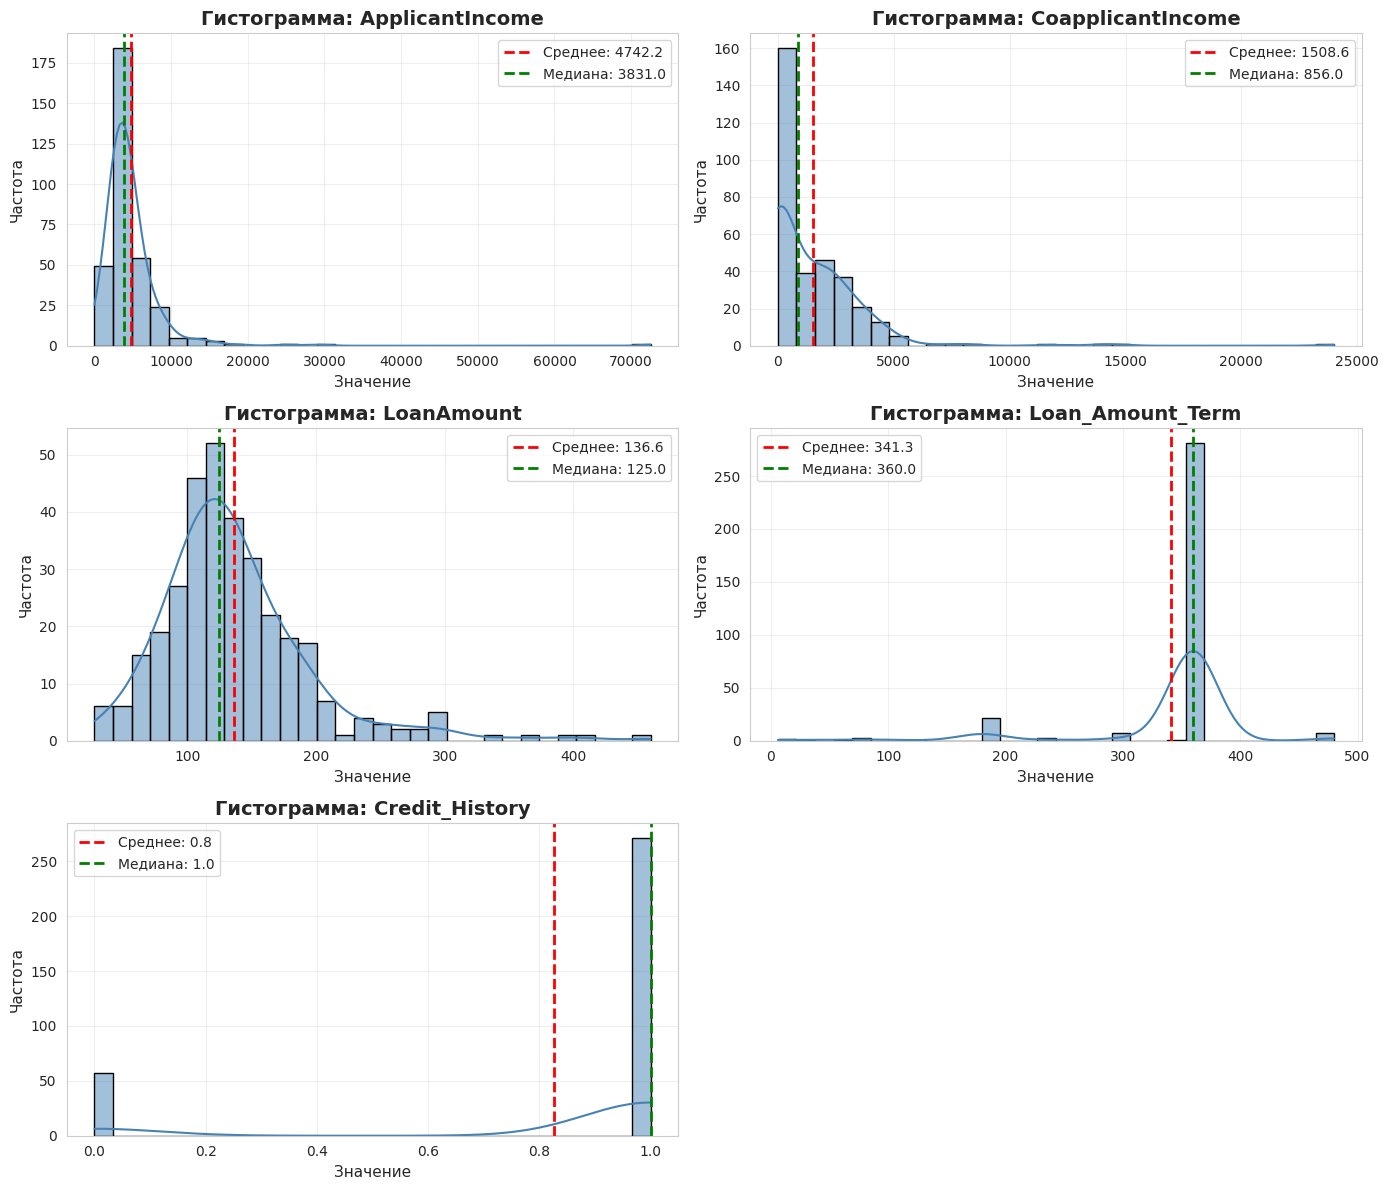

In [ ]:
# Настройка стиля визуализации
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.ravel()

# Построение гистограмм для 5 признаков
for i, feature in enumerate(numeric_features):
    sns.histplot(df_clean[feature], bins=30, kde=True, ax=axes[i], color='steelblue', edgecolor='black')
    axes[i].set_title(f'Гистограмма: {feature}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Значение', fontsize=11)
    axes[i].set_ylabel('Частота', fontsize=11)
    axes[i].grid(True, alpha=0.3)

    # Добавление вертикальных линий для среднего и медианы
    mean_val = df_clean[feature].mean()
    median_val = df_clean[feature].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.1f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.1f}')
    axes[i].legend()

axes[-1].set_visible(False)

plt.tight_layout()
plt.savefig('loan_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

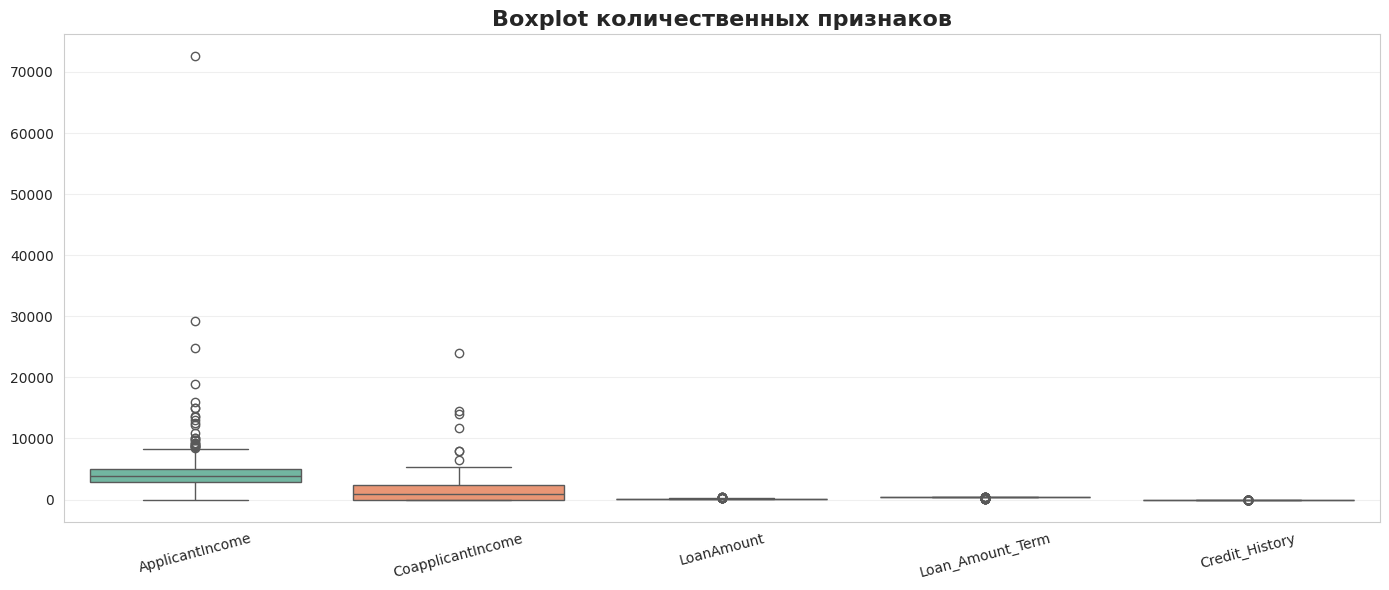

In [ ]:
# Boxplot для оценки выбросов
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean[numeric_features], palette='Set2')
plt.title('Boxplot количественных признаков', fontsize=16, fontweight='bold')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('loan_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()